## **Importing files and libraries**

### Libraries

In [8]:
# For Data
import os
#import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from datetime import datetime
from scipy import  fftpack
#from re import split
import emd
from scipy import ndimage
import statistics


import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ARResults
from arch import arch_model
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.filters.hp_filter import hpfilter
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL



import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import style
from mpl_toolkits.mplot3d import axes3d

# Distributions
#from scipy import stats
#import inspect
#from statsmodels.distributions.empirical_distribution import ECDF

# matplotlib Settings
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# warnings Settings
import warnings
warnings.filterwarnings('ignore')


#Others
from IPython.display import Image
#import numpy as np
#import scipy.fftpack as fourier
#import matplotlib.pyplot as plt
#import scipy.io.wavfile as waves

### Files

#### Load

In [9]:
# Verificar el directorio actual
print("Directorio actual:", os.getcwd())

# Cambiar al directorio superior (bajar un nivel)
os.chdir('../..')

# Verificar el nuevo directorio
print("Nuevo directorio actual:", os.getcwd())

Directorio actual: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails\Codes\Past
Nuevo directorio actual: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails


In [10]:
#Function for simply the files load
def dir(r_or_p, year=2000):
    rp = ("Raw", "Calibrated", "Electron")
    r_or_p = r_or_p.strip().capitalize()
    if r_or_p not in rp: #Validate data
        raise NameError("Only Raw, Processed o Electron")

    if r_or_p == rp[0]:
      dir = f"Data/2000/Raw/{year}.parquet"
      return dir
    elif r_or_p == rp[1]:
      dir = f"Data/2000/Calibrated/{year}.parquet"
      return dir
    else:
      dir = f"Data/2000/Electron/{year}.parquet"

      return dir


In [11]:
#Years that have a analysis
i_year = 1998
f_year = 2023
step_year = 5
other_year = 2000

years = [year for year in range(i_year, f_year + step_year, step_year)] #+ [other_year]

years.sort()
years = [2000]
years

[2000]

#### Raw data

In [12]:
Raw_data = {}
for year in years:
  Raw_data[year] = pd.read_parquet(dir("Raw",year))


Raw_data

{2000:          YY  MON  DY  DOY:HH:MM:SS     Seconds  SPEED    Np  Vth  N/S  V_He  \
 0         0  Jan   1  001:00:00:10         0.0    667  4.76   62  1.4   713   
 1         0  Jan   1  001:00:00:40        30.0    673  4.57   63  1.2   721   
 2         0  Jan   1  001:00:01:10        60.0    673  4.59   63  1.2   721   
 3         0  Jan   1  001:00:01:40        90.0    667  4.76   62  1.6   712   
 4         0  Jan   1  001:00:02:10       120.0    668  5.16   60  1.3   711   
 ...      ..  ...  ..           ...         ...    ...   ...  ...  ...   ...   
 1033323   0  Dec  31  366:23:57:16  31622226.0    280  6.53   17  0.3   281   
 1033324   0  Dec  31  366:23:57:46  31622256.0    279  6.37   17  0.1   279   
 1033325   0  Dec  31  366:23:58:20  31622290.0    275  6.15   17  0.3   276   
 1033326   0  Dec  31  366:23:58:50  31622320.0    278  6.39   17  0.6   279   
 1033327   0  Dec  31  366:23:59:20  31622350.0    278  6.32   17  0.8   278   
 
          GSE_X  GSE_Y  GSE_Z  R

#### Processed/ Calibrated data

In [13]:
Calibrated_data = {}
for year in years:
  Calibrated_data[year] = pd.read_parquet(dir("Calibrated",year))


Calibrated_data

{2000:         YY  MON  DY  DOY:HH:MM:SS     Seconds  SPEED    Np  Vth  N/S  V_He  \
 0       00  Jan  01  001:00:00:10         0.0    669  4.69   62  1.6   715   
 1       00  Jan  01  001:00:05:10       300.0    677  4.69   63  0.6   725   
 2       00  Jan  01  001:00:10:13       603.0    689  4.10   63 -0.1   738   
 3       00  Jan  01  001:00:15:15       905.0    692  3.74   64 -1.2   742   
 4       00  Jan  01  001:00:20:16      1206.0    689  3.78   63 -1.2   738   
 ...     ..  ...  ..           ...         ...    ...   ...  ...  ...   ...   
 103615  00  Dec  31  366:23:36:08  31620958.0    282  7.56   17  0.7   282   
 103616  00  Dec  31  366:23:41:10  31621260.0    284  7.06   17  0.7   285   
 103617  00  Dec  31  366:23:46:13  31621563.0    289  6.84   17  1.0   289   
 103618  00  Dec  31  366:23:51:15  31621865.0    290  7.04   18  1.2   291   
 103619  00  Dec  31  366:23:56:17  31622167.0    286  6.85   17  0.5   287   
 
         GSE_X  GSE_Y  GSE_Z  RANGE  HGLAT  

## Gradient Descent

In [2]:

import numpy as np
import scipy.signal as sgnl
import matplotlib.pyplot as plt


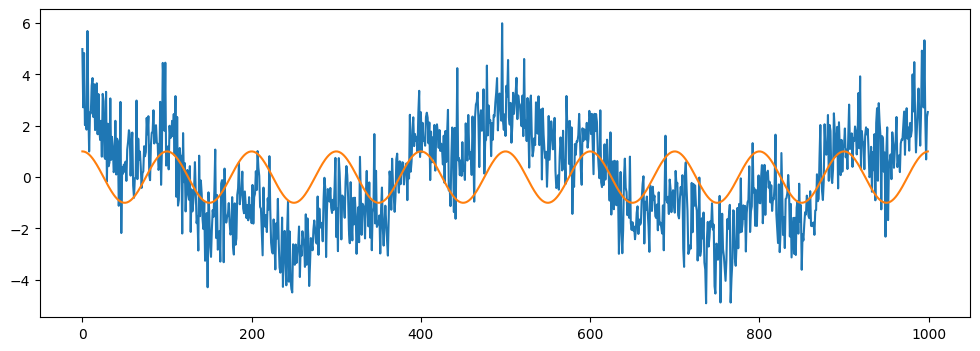

In [4]:
N=1000
x=np.cos (2*np. pi*np.arange(N)/100)
noise = np.random.randn (N) + 2*np.cos (2*np. pi*np.arange(N)/500)
x_noise=x+ noise
plt.figure(figsize=(12,4))
plt.plot(x_noise)
plt.plot(x)
plt.show()

In [6]:
M=64
mu=10e-4
w=np.zeros((64,))
e=np.zeros((N-M,), dtype=float)
x_hat= np.zeros((N-M,))
for n in range (N-M):
    xn = np. squeeze (x[n+M:n: -1])
    x_hat [n]= np.dot (xn, w)
    e[n] = x_noise[n+M] - x_hat[n]
    w = w + 2 * mu * e[n] * xn

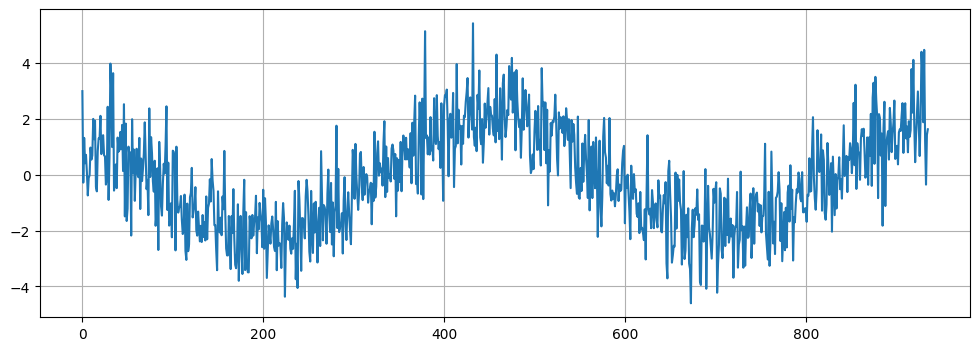

In [7]:
plt.figure(figsize=(12,4))
plt.plot(e)
plt.grid()
plt.show()

In [18]:
year = 2000
column = "SPEED"
data=Raw_data[year]
ecg=data[column]

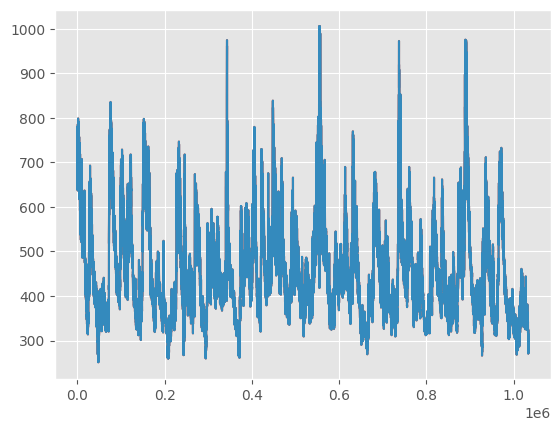

In [20]:
N = len(ecg)
linea = 300*np.cos (2*np.pi*np.arange(N)/100)
ecg_noise = ecg #+ linea + 20*np.random.randn(N)
#ecg_noise = ecg_noise / np.std (ecg_noise)
plt.plot(ecg)
plt.plot(ecg_noise)
#plt.xlim (0,2000)
plt.show()